# Uge 3: Indre produkt og Norm

Demo af Magnus Troen

In [1]:
from sympy import*
from dtumathtools import*
init_printing()

## Indre produkt i SymPy

Det sædvanlige indre produkt $\left<\cdot, \cdot \right>$ i $\mathbb{F}^n$ er givet ved:

$$
\left<\cdot, \cdot \right>: V \times V \to \mathbb{F},\quad \left<\boldsymbol{x}, 
\boldsymbol{y} \right> = \sum_{k=1}^{n} x_k\overline{y}_k,
$$

For alle $\boldsymbol{x},\boldsymbol{y} \in V$. Normen på $\mathbb{F}^n$ er givet *ud fra det indre produkt* ved formlen $\Vert \boldsymbol{x} \Vert = \sqrt{\left<\boldsymbol{x},  \boldsymbol{x} \right>}$. Normen af en vektor er et reelt tal, der ikke er negativt, og det kan udregnes ved:   

$$
\Vert \cdot \Vert: V \to \mathbb{R}, \quad \Vert \boldsymbol{x} \Vert = \left(\sum_{k=1}^{n} |x_k|^2 \right)^{1/2}
$$

Denne norm har mange navne: den euklidiske norm, $2$-normen, $\ell^2$-normen. Vi bruger denne medmindre andet nævnes.

Dette kan også opnås i `SymPy` med kommandoerne hhv. $\verb|x.dot(y, conjugate_convention = 'right')|$ og $\verb|x.norm(2)|$ eller bare $\verb|x.norm()|$. 

For ikke at skulle skrive så meget hver gang vi vil bruge et indre produkt definerer vi nu funktionen `inner`:

In [2]:
def inner(x1: Matrix,x2: Matrix):
    '''
    Computes the inner product of two vectors of same length.
    '''
    
    return x1.dot(x2, conjugate_convention = 'right')

MutableDenseMatrix.inner = inner
ImmutableDenseMatrix.inner = inner

Vi kan nu teste at funktionen virker som forventet:

Vi prøver med vektorerne 

$$
\pmb{x} = \left[\begin{matrix}1\\2\end{matrix}\right],
\pmb{y} = \left[\begin{matrix}2 - i\\2\end{matrix}\right]
$$

$$
\left<\pmb{x},\pmb{y} \right> = 1\cdot(\overline{2-i}) + 2\cdot \overline{2} = 2+i + 4= 6 + i.
$$

In [3]:
x = Matrix([1, 2])
y = Matrix([2-I, 2])

x.inner(y), inner(x,y), y.inner(x), inner(y,x)

Som forventet.

`x.dot(y)` udregner prik-produktet, som kendt fra gymnasiet, **uden** kompleks konjugering, altså $\boldsymbol{x} \cdot  \boldsymbol{y} = \sum_{k=1}^{n} x_k {y}_k$. Hvad sker der hvis vi glemmer `conjugate_convention = 'right'`? Et problem er at `sqrt(x.dot(x))` som skal være en norm ikke nødvendigvis bliver et positivt tal, som vi ville forvente af en længde:

In [4]:
sqrt(y.dot(y)).simplify()

Mens normen af $\pmb{y}$ skal udregnes ved:

In [5]:
sqrt(inner(y,y)).simplify(), y.norm(), y.norm(2)

## Projektion på linjen

Lad $\boldsymbol{x}, \boldsymbol{y} \in \mathbb{F}^n$, da vil projektionen af $\boldsymbol{x}$ på linjen $Y = \mathrm{span}\{\boldsymbol{y}\}$ kunne opnås med

$$
\operatorname{Proj}_Y(\boldsymbol{x}) = \frac{\left<\boldsymbol{x},\boldsymbol{y} \right>}{\left<\boldsymbol{y},\boldsymbol{y} \right>}\boldsymbol{y}
= \left<\boldsymbol{x},\boldsymbol{u}\right>\boldsymbol{u},
$$

hvor $\boldsymbol{u} = \frac{\boldsymbol{y}}{||\boldsymbol{y}||}$.

### Eksempel i $\mathbb{R}^2$

Lad først $\boldsymbol{x}_1, \boldsymbol{x}_2 \in \mathbb{R}^2$, være givet ved:

$$
\boldsymbol{x}_1 = \begin{bmatrix} 3\\6\end{bmatrix}, \boldsymbol{x}_2 = \begin{bmatrix} 2\\1\end{bmatrix}.
$$

Vi ønsker at projektere $\boldsymbol{x}_1$ ned på linjen givet ved $X_2 = \mathrm{span}\{\boldsymbol{x}_2\}$

In [6]:
x1 = Matrix([3,6])
x2 = Matrix([2,1])

projX2_x1 = x1.inner(x2)/x2.inner(x2) * x2 # inner(x1,x2)/x2.norm()**2 * x2
projX2_x1

⎡24/5⎤
⎢    ⎥
⎣12/5⎦

Da vi arbejder med $\mathbb{R}^2$ kan dette illustreres:

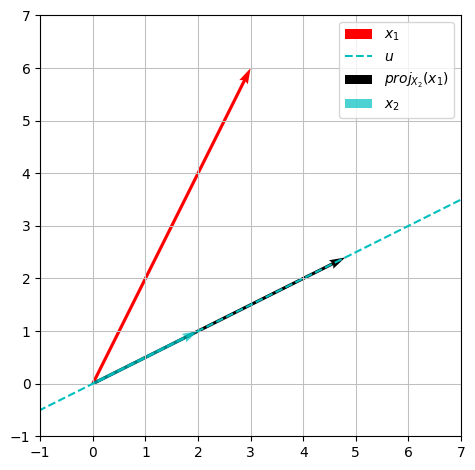

In [7]:
x = symbols('x')
plot_x1 = dtuplot.quiver((0,0),x1,rendering_kw={'color':'r', 'label': '$x_1$'}, xlim = (-1,7), ylim = (-1,7), show = False, aspect='equal')
plot_x2 = dtuplot.quiver((0,0),x2,rendering_kw={'color':'c', 'label': '$x_2$', 'alpha': 0.7}, show = False)
plot_projX2 = dtuplot.quiver((0,0),projX2_x1,rendering_kw={'color':'k', 'label': '$proj_{X_2}(x_1)$'},show = False)
plot_X2 = dtuplot.plot(x2[1]/x2[0] * x, label = '$u$',rendering_kw={'color':'c', 'linestyle': '--'}, legend = True,show = False)

(plot_x1 + plot_X2 + plot_projX2 + plot_x2).show()

### Eksempel i $\mathbb{C}^4$ via lineær afbildning

Først definerer vi vektorerne

In [8]:
c1 = Matrix([2+I, 3, 5-I, 6])
c2 = Matrix([1, I, 3-I, 2])
u = simplify(c2/c2.norm())
c1,c2,u

⎛                  ⎡ 1/4 ⎤⎞
⎜                  ⎢     ⎥⎟
⎜⎡2 + ⅈ⎤  ⎡  1  ⎤  ⎢  ⅈ  ⎥⎟
⎜⎢     ⎥  ⎢     ⎥  ⎢  ─  ⎥⎟
⎜⎢  3  ⎥  ⎢  ⅈ  ⎥  ⎢  4  ⎥⎟
⎜⎢     ⎥, ⎢     ⎥, ⎢     ⎥⎟
⎜⎢5 - ⅈ⎥  ⎢3 - ⅈ⎥  ⎢3   ⅈ⎥⎟
⎜⎢     ⎥  ⎢     ⎥  ⎢─ - ─⎥⎟
⎜⎣  6  ⎦  ⎣  2  ⎦  ⎢4   4⎥⎟
⎜                  ⎢     ⎥⎟
⎝                  ⎣ 1/2 ⎦⎠

Nu kan projektionen $\mathrm{Proj}_{\boldsymbol{c}_2}$ beskrives ved den lineære afbildning:

$$
\boldsymbol{P}: \mathbb{C}^4 \to \mathbb{C}^4, \phantom{...} \boldsymbol{P}(\boldsymbol{c}_1) = \boldsymbol{u}\boldsymbol{u}^* \boldsymbol{c_1}
$$

hvor $\boldsymbol{u} = \boldsymbol{c_2}/||\boldsymbol{c_2}||_2$

In [9]:
P = expand(u*u.adjoint())
P

⎡            -ⅈ        3    ⅈ          ⎤
⎢ 1/16       ───       ── + ──     1/8 ⎥
⎢            16        16   16         ⎥
⎢                                      ⎥
⎢  ⅈ                    1    3⋅ⅈ    ⅈ  ⎥
⎢  ──        1/16     - ── + ───    ─  ⎥
⎢  16                   16   16     8  ⎥
⎢                                      ⎥
⎢3    ⅈ     1    3⋅ⅈ              3   ⅈ⎥
⎢── - ──  - ── - ───     5/8      ─ - ─⎥
⎢16   16    16   16               8   8⎥
⎢                                      ⎥
⎢            -ⅈ         3   ⅈ          ⎥
⎢  1/8       ───        ─ + ─      1/4 ⎥
⎣             8         8   8          ⎦

In [10]:
simplify(P*c1)

⎡  15/8   ⎤
⎢         ⎥
⎢  15⋅ⅈ   ⎥
⎢  ────   ⎥
⎢   8     ⎥
⎢         ⎥
⎢45   15⋅ⅈ⎥
⎢── - ────⎥
⎢8     8  ⎥
⎢         ⎥
⎣  15/4   ⎦

Vi kan kontrollere at dette giver det samme forrige metode:

In [11]:
simplify(P*c1 - c1.inner(u)/u.inner(u)*u)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

Projektionen af $\pmb{c}_2$ ned på udspændingen af $\pmb{c}_2$ bør ikke ændre på vektoren $\pmb{c}_2$. Las os tjekke dette:

In [12]:
P*c2

⎡  3   ⎛3    ⅈ ⎞           ⎤
⎢  ─ + ⎜── + ──⎟⋅(3 - ⅈ)   ⎥
⎢  8   ⎝16   16⎠           ⎥
⎢                          ⎥
⎢3⋅ⅈ   ⎛  1    3⋅ⅈ⎞        ⎥
⎢─── + ⎜- ── + ───⎟⋅(3 - ⅈ)⎥
⎢ 8    ⎝  16   16 ⎠        ⎥
⎢                          ⎥
⎢45   15⋅ⅈ     ⎛  1    3⋅ⅈ⎞⎥
⎢── - ──── + ⅈ⋅⎜- ── - ───⎟⎥
⎢16    16      ⎝  16   16 ⎠⎥
⎢                          ⎥
⎢   3   ⎛3   ⅈ⎞            ⎥
⎢   ─ + ⎜─ + ─⎟⋅(3 - ⅈ)    ⎥
⎣   4   ⎝8   8⎠            ⎦

Det ser umiddelbart ikke så godt ud. Men der er heldigvis hjælp at hente, da vi kan simplificere udtrykket i SymPy:

In [13]:
simplify(P*c2), c2

⎛⎡  1  ⎤  ⎡  1  ⎤⎞
⎜⎢     ⎥  ⎢     ⎥⎟
⎜⎢  ⅈ  ⎥  ⎢  ⅈ  ⎥⎟
⎜⎢     ⎥, ⎢     ⎥⎟
⎜⎢3 - ⅈ⎥  ⎢3 - ⅈ⎥⎟
⎜⎢     ⎥  ⎢     ⎥⎟
⎝⎣  2  ⎦  ⎣  2  ⎦⎠

Matricen $\boldsymbol{P}$ er pr definition **hermitisk** altså er $\boldsymbol{P} = \boldsymbol{P}^*$, dette kan testes ved:

In [14]:
P.is_hermitian

True

Eller

In [15]:
simplify(P-P.adjoint())

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

## Ortonormale baser

Ortonormale baser viser sig at være vildt praktiske. Det er for eksempel meget nemmere at finde koordinatvektorer med ortonormale baser.

Lad for eksempel

$$
\beta = (\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3 ) = \left( 
    \left[\begin{matrix}\frac{\sqrt{3}}{3}\\\frac{\sqrt{3}}{3}\\\frac{\sqrt{3}}{3}\end{matrix}\right],
    \left[\begin{matrix}\frac{\sqrt{2}}{2}\\0\\- \frac{\sqrt{2}}{2}\end{matrix}\right],
    \left[\begin{matrix}- \frac{\sqrt{6}}{6}\\\frac{\sqrt{6}}{3}\\- \frac{\sqrt{6}}{6}\end{matrix}\right]
\right )
$$

være en ortonormal basis for $\mathbb{R}^3$. Nu kan koordinatvektoren $\phantom{ }_\beta\boldsymbol{x}$ findes ved

$$
\phantom{ }_\beta\boldsymbol{x} = \begin{bmatrix} \left<\boldsymbol{u}_1, \boldsymbol{x} \right>\\
                                                  \left<\boldsymbol{u}_2, \boldsymbol{x} \right>\\
                                                  \left<\boldsymbol{u}_3, \boldsymbol{x} \right> \end{bmatrix}
$$

for alle $\boldsymbol{x} \in \mathbb{R}^3$ (sammenlign med Mat1a hvor vi skulle løse et lineært ligningssystem for at finde koordinatvektorer.)

Vi kan starte med at overbevise os selv om at $\beta$ er en ortonormal basis for $\mathbb{R}^3$. Først of fremmest skal $\boldsymbol{u}_1, \boldsymbol{u}_2,\boldsymbol{u}_3$ være ortonormale, hvilket kan vises ved at:

$$
\left< \boldsymbol{u}_i, \boldsymbol{u}_j\right> = \begin{cases} 0 & i \neq j\\ 1 & i = j\end{cases},\phantom{...} i,j = 1,2,3
$$

In [16]:
u1 = Matrix([sqrt(3)/3, sqrt(3)/3, sqrt(3)/3])
u2 = Matrix([sqrt(2)/2, 0, -sqrt(2)/2])
u3 = Matrix([[-sqrt(6)/6], [sqrt(6)/3], [-sqrt(6)/6]])

u1.inner(u1), u1.inner(u2), u1.inner(u3), u2.inner(u2), u2.inner(u3), u3.inner(u3) 

Dette viser at $\beta$ består af 3 ortonormale vektorer. Da ortonormale vektorer er lineært uafhængige, er vektorerne i $\beta$ lineært uafhængige. Men 3 lineært uafhængige vektorer i $\mathbb{R}^3$ udspænder $\mathbb{R}^3$, så vi konkluderer at $\beta$ er en **ortonormal basis** for $\mathbb{R}^3$.

Vi kan for eksempel nu finde $\boldsymbol{x} = [1,2,3]$ 's koordinatvektor i $\beta$-basen.

In [17]:
x = Matrix([1,2,3])
beta_x = Matrix([x.inner(u1) , x.inner(u2) , x.inner(u3)])
beta_x

⎡2⋅√3⎤
⎢    ⎥
⎢-√2 ⎥
⎢    ⎥
⎣ 0  ⎦

### Gram-Schmidt algoritmen

Vi har fået give en liste af vektorer $\gamma = v_1,v_2,v_3,v_4$ for $\mathbb{C}^4$, hvor

$$
\boldsymbol{v}_1 = \left[\begin{matrix}2 i\\0\\0\\0\end{matrix}\right], \:
\boldsymbol{v}_2 = \left[\begin{matrix}i\\1\\1\\0\end{matrix}\right], \:
\boldsymbol{v}_3 = \left[\begin{matrix}0\\i\\1\\1\end{matrix}\right], \:
\boldsymbol{v}_4 = \left[\begin{matrix}0\\0\\0\\i\end{matrix}\right].
$$

Vi ønsker at fremstille en ortonormal basis ud fra listen $\gamma$ ved hjælp af Gram-Schmidt algoritmen.

In [18]:
v1 = Matrix([2*I,0,0, 0])
v2 = Matrix([I, 1, 1, 0])
v3 = Matrix([0, I, 1, 1])
v4 = Matrix([0, 0, 0, I])

Vi skal først kontrollere at vektorene udgører en basis for $\mathbb{C}^4$:

In [19]:
# vi skal bruge 4 lineært uafhængige vektorer for at danne en basis for C^4
V = Matrix.hstack(v1,v2,v3,v4)
V.rref(pivots=False)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

Rangen er altå 4, så dette er ok.

Først sættes $\boldsymbol{w}_1 = \boldsymbol{v}_1$ og $\boldsymbol{u}_1$ findes ved at normalisere $\boldsymbol{w}_1$:

In [20]:
w1 = v1
u1 = w1/w1.norm()
u1

⎡ⅈ⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

Nu findes de resterende ortonormale vektorer ved:

i)
$$
\boldsymbol{w}_k = \boldsymbol{v}_k  - \sum_{j = 1}^{k-1}\left<\boldsymbol{v}_k, \boldsymbol{u}_j\right>\boldsymbol{u}_j
$$

ii)
$$
\boldsymbol{u}_k = \frac{\boldsymbol{w}_k}{||\boldsymbol{w}_k||}
$$

In [21]:
w2 = simplify(v2 - v2.inner(u1)*u1)
u2 = expand(w2/w2.norm())

w3 = simplify(v3 - v3.inner(u1)*u1 - v3.inner(u2)*u2)
u3 = expand(w3/w3.norm())

w4 = simplify(v4 - v4.inner(u1)*u1 - v4.inner(u2)*u2 - v4.inner(u3)*u3)
u4 = expand(w4/w4.norm())

u1,u2,u3,u4

⎛           ⎡     0     ⎤  ⎡     0     ⎤⎞
⎜     ⎡0 ⎤  ⎢           ⎥  ⎢           ⎥⎟
⎜     ⎢  ⎥  ⎢  √2   √2⋅ⅈ⎥  ⎢ √2   √2⋅ⅈ ⎥⎟
⎜⎡ⅈ⎤  ⎢√2⎥  ⎢- ── + ────⎥  ⎢ ── + ──── ⎥⎟
⎜⎢ ⎥  ⎢──⎥  ⎢  4     4  ⎥  ⎢ 4     4   ⎥⎟
⎜⎢0⎥  ⎢2 ⎥  ⎢           ⎥  ⎢           ⎥⎟
⎜⎢ ⎥, ⎢  ⎥, ⎢ √2   √2⋅ⅈ ⎥, ⎢  √2   √2⋅ⅈ⎥⎟
⎜⎢0⎥  ⎢√2⎥  ⎢ ── - ──── ⎥  ⎢- ── - ────⎥⎟
⎜⎢ ⎥  ⎢──⎥  ⎢ 4     4   ⎥  ⎢  4     4  ⎥⎟
⎜⎣0⎦  ⎢2 ⎥  ⎢           ⎥  ⎢           ⎥⎟
⎜     ⎢  ⎥  ⎢    √2     ⎥  ⎢   √2⋅ⅈ    ⎥⎟
⎜     ⎣0 ⎦  ⎢    ──     ⎥  ⎢   ────    ⎥⎟
⎝           ⎣    2      ⎦  ⎣    2      ⎦⎠

Det overlades til læseren selv at kontrolere at $\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3,\boldsymbol{u}_4$ er ortonormale:

In [22]:
simplify(u1.inner(u2)) # og så videre

Den nye ortonormal basis $\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3,\boldsymbol{u}_4$ opfylder

$$
\mathrm{  ½}\left\{\boldsymbol{u}_1\right\} = \mathrm{span}\left\{\boldsymbol{v}_1 \right\}.
$$

$$
\mathrm{span}\left\{\boldsymbol{u}_1,\boldsymbol{u}_2\right\} = \mathrm{span}\left\{\boldsymbol{v}_1,\boldsymbol{v}_2\right\}.
$$

$$
\mathrm{span}\left\{\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3\right\} = \mathrm{span}\left\{\boldsymbol{v}_1,\boldsymbol{v}_2,\boldsymbol{v}_3\right\}.
$$

og

$$
\mathrm{span}\left\{\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3,\boldsymbol{u}_4\right\} = \mathrm{span}\left\{\boldsymbol{v}_1,\boldsymbol{v}_2,\boldsymbol{v}_3,\boldsymbol{v}_4\right\}.
$$

Der refereres til beviset for <a href="../_assets/notesvol2.pdf#eq:gram-schmidt-spanning-property">Theorem 2.5.2</a>

Det samme resultat kan opnås med `SymPy's` indbyggede funktion $\verb|GramSchimdt|$:

In [23]:
y1,y2,y3,y4 = GramSchmidt([v1,v2,v3,v4], orthonormal=True)
y1,y2,expand(y3),expand(y4)

⎛           ⎡     0     ⎤  ⎡     0     ⎤⎞
⎜     ⎡0 ⎤  ⎢           ⎥  ⎢           ⎥⎟
⎜     ⎢  ⎥  ⎢  √2   √2⋅ⅈ⎥  ⎢ √2   √2⋅ⅈ ⎥⎟
⎜⎡ⅈ⎤  ⎢√2⎥  ⎢- ── + ────⎥  ⎢ ── + ──── ⎥⎟
⎜⎢ ⎥  ⎢──⎥  ⎢  4     4  ⎥  ⎢ 4     4   ⎥⎟
⎜⎢0⎥  ⎢2 ⎥  ⎢           ⎥  ⎢           ⎥⎟
⎜⎢ ⎥, ⎢  ⎥, ⎢ √2   √2⋅ⅈ ⎥, ⎢  √2   √2⋅ⅈ⎥⎟
⎜⎢0⎥  ⎢√2⎥  ⎢ ── - ──── ⎥  ⎢- ── - ────⎥⎟
⎜⎢ ⎥  ⎢──⎥  ⎢ 4     4   ⎥  ⎢  4     4  ⎥⎟
⎜⎣0⎦  ⎢2 ⎥  ⎢           ⎥  ⎢           ⎥⎟
⎜     ⎢  ⎥  ⎢    √2     ⎥  ⎢   √2⋅ⅈ    ⎥⎟
⎜     ⎣0 ⎦  ⎢    ──     ⎥  ⎢   ────    ⎥⎟
⎝           ⎣    2      ⎦  ⎣    2      ⎦⎠

### Unitære matricer

Kvadratiske matricer der opfylder kriteriet

$$
\boldsymbol{U}^*\boldsymbol{U} = \boldsymbol{I}
$$

kaldes *unitære*. Sådanne matricer opfylder også $\boldsymbol{U}\boldsymbol{U}^* = \boldsymbol{I}$.

Hvis $\boldsymbol{U} \in M_n(\mathbb{R})$ kaldes $\boldsymbol{U}$ *ortogonal* (**IKKE** ortonormal). For ortogonale matricer gælder

$$
\boldsymbol{QQ}^T = \boldsymbol{Q}^T\boldsymbol{Q} = \boldsymbol{I}
$$

Reelle, ortogonale matricer er altså automatisk også unitære. 

Matricen

$$
\boldsymbol{U} = \left[\boldsymbol{u}_1, \boldsymbol{u}_2, \boldsymbol{u}_3, \boldsymbol{u}_4\right]
$$

med u-vektorerne fra Gram-Schmidt er unitær (hvilket gælder generelt når man bruger Gram-Schmidt på $n$ lineært uafhængige vektorer i $\mathbb{F}^n$). 

Matricen $U$ er:

In [24]:
U = Matrix.hstack(u1,u2,u3,u4)
U

⎡ⅈ  0        0            0     ⎤
⎢                               ⎥
⎢   √2    √2   √2⋅ⅈ   √2   √2⋅ⅈ ⎥
⎢0  ──  - ── + ────   ── + ──── ⎥
⎢   2     4     4     4     4   ⎥
⎢                               ⎥
⎢   √2   √2   √2⋅ⅈ     √2   √2⋅ⅈ⎥
⎢0  ──   ── - ────   - ── - ────⎥
⎢   2    4     4       4     4  ⎥
⎢                               ⎥
⎢           √2          √2⋅ⅈ    ⎥
⎢0  0       ──          ────    ⎥
⎣           2            2      ⎦

Det adjungerede (= transponeret og komplekskonjugeret) matrix $U^*$ af $U$ er:

In [25]:
U.adjoint(), conjugate(U.T)

⎛⎡-ⅈ       0            0         0   ⎤  ⎡-ⅈ       0            0         0   ⎤⎞
⎜⎢                                    ⎥  ⎢                                    ⎥⎟
⎜⎢        √2           √2             ⎥  ⎢        √2           √2             ⎥⎟
⎜⎢0       ──           ──         0   ⎥  ⎢0       ──           ──         0   ⎥⎟
⎜⎢        2            2              ⎥  ⎢        2            2              ⎥⎟
⎜⎢                                    ⎥  ⎢                                    ⎥⎟
⎜⎢      √2   √2⋅ⅈ   √2   √2⋅ⅈ     √2  ⎥, ⎢      √2   √2⋅ⅈ   √2   √2⋅ⅈ     √2  ⎥⎟
⎜⎢0   - ── - ────   ── + ────     ──  ⎥  ⎢0   - ── - ────   ── + ────     ──  ⎥⎟
⎜⎢      4     4     4     4       2   ⎥  ⎢      4     4     4     4       2   ⎥⎟
⎜⎢                                    ⎥  ⎢                                    ⎥⎟
⎜⎢     √2   √2⋅ⅈ     √2   √2⋅ⅈ  -√2⋅ⅈ ⎥  ⎢     √2   √2⋅ⅈ     √2   √2⋅ⅈ  -√2⋅ⅈ ⎥⎟
⎜⎢0    ── - ────   - ── + ────  ──────⎥  ⎢0    ── - ────   - ── + ────  ──────⎥⎟
⎝⎣     4     4       4     4

At $U$ er unitær kan tjekkes ved:

In [26]:
simplify(U*U.adjoint()), simplify(U.adjoint()*U)

⎛⎡1  0  0  0⎤  ⎡1  0  0  0⎤⎞
⎜⎢          ⎥  ⎢          ⎥⎟
⎜⎢0  1  0  0⎥  ⎢0  1  0  0⎥⎟
⎜⎢          ⎥, ⎢          ⎥⎟
⎜⎢0  0  1  0⎥  ⎢0  0  1  0⎥⎟
⎜⎢          ⎥  ⎢          ⎥⎟
⎝⎣0  0  0  1⎦  ⎣0  0  0  1⎦⎠